<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/main/Chapter5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC #SVC: Support Vector Classifier  SVM: Support Vector Regressor

In [27]:
iris = datasets.load_iris()
x = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [28]:
svm_clf = Pipeline(steps=[('scaler',StandardScaler()),
                          ('linear_svc',LinearSVC(loss='hinge',C=1))])
svm_clf.fit(x,y)
svm_clf.predict([[5.5,1.5]])

array([1.])

In [29]:
#two other methods to achieve this
#1
from sklearn.svm import SVC #SVC supports kernel trick while LinearSVC doesn't
svc_clf = Pipeline(steps=[('scaler',StandardScaler()),
                          ('linear_svc',SVC(kernel='linear',C=1))])
svc_clf.fit(x,y)
svc_clf.predict([[5.5,1.5]])

array([1.])

In [30]:
#2
from sklearn.linear_model import SGDClassifier
sgd_clf = Pipeline(steps=[('scaler',StandardScaler()),
                          ('sgd',SGDClassifier(loss='hinge',alpha= 1/(150*1)))]) #alpha = 1/(m*C)
sgd_clf.fit(x,y)
sgd_clf.predict([[5.5,1.5]])

array([1.])

## **Common Kernels:** 
*(you can think of a Kernel as a transformation)*

1. Linear
2. Polynomial
3. Gaussian RBF
4. Sigmoid

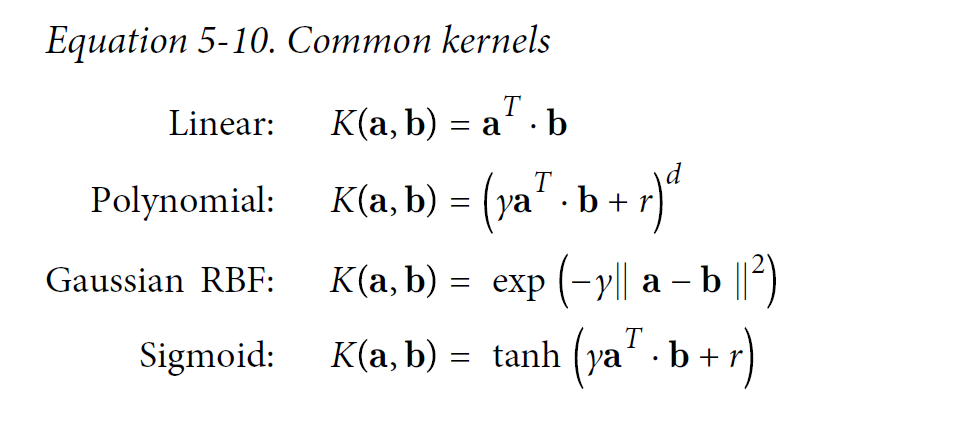

**Polynomial Kernel**

In [31]:
poly_kernel_svm = Pipeline(steps=[('scaler', StandardScaler()),
                                  ('polynomial kernel', SVC(kernel='poly', degree=3, coef0=1, C=5))])
poly_kernel_svm.fit(x,y)
poly_kernel_svm.predict([[5.5,1.5]])

array([1.])

**Gaussian RBF Kernel**

In [32]:
rbf_kernel_svm_clf = Pipeline(steps=[('scaler', StandardScaler()),
                                     ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))])
rbf_kernel_svm_clf.fit(x,y)
rbf_kernel_svm_clf.predict([[5.5,1.5]])

array([0.])

**SVM Regression**

In [33]:
from sklearn.svm import LinearSVR #regression equivaalent of LinearSVC
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(x,y)

LinearSVR(epsilon=1.5)

In [34]:
from sklearn.svm import SVR #regression equivaalent of SVC
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x,y)

SVR(C=100, degree=2, kernel='poly')

Mathematics of SVM:

https://mml-book.github.io/book/mml-book.pdf chapter 12